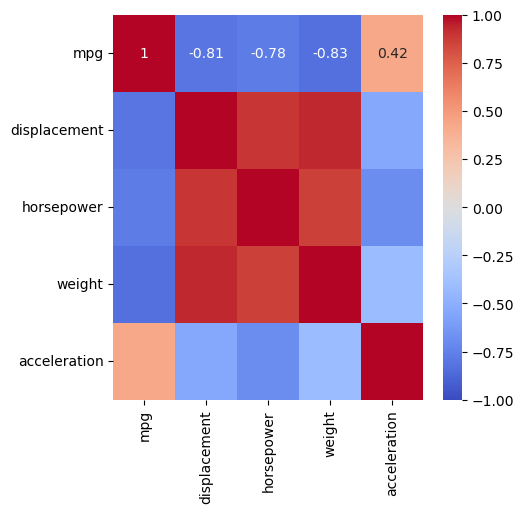

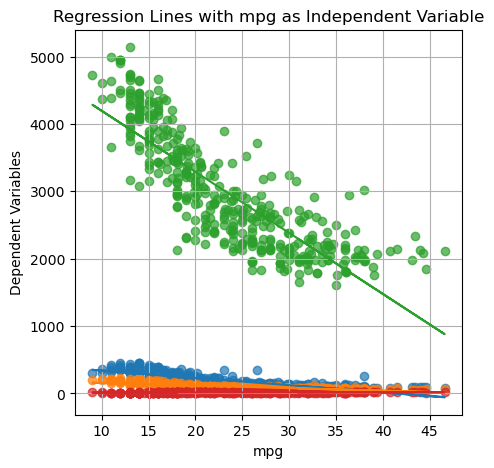

In [ ]:
# Exercise 1
# exercise 1.1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('auto-mpg.csv')
# Drop the origin column when computing correlations
data_droppedUSA = data.drop('origin', axis=1)

corr_matrix = data_droppedUSA.corr()
plt.figure(figsize=(5,5))
# Display correlation values on the plot
# Use a diverging color scale with range [-1, 1] centered at 0
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    vmin = -1,
    vmax = 1,
    center = 0
    )
plt.show()

# Compute the regression line
results = {}
for var in ['displacement', 'horsepower', 'weight', 'acceleration']:
    y = data[var]
    x = data['mpg']
    a = y.cov(x) / x.var()  # Slope
    b = y.mean() - a * x.mean()  # Intercept
    results[var] = {'slope': a, 'intercept': b}

# Plot all scatter points and regression lines
plt.figure(figsize=(5,5))

for var, res in results.items():
    a, b = res['slope'], res['intercept']
    x_vals = data['mpg']
    y_vals = a * x_vals + b
    plt.scatter(data['mpg'], data[var], label=f'{var} data', alpha=0.7)
    plt.plot(x_vals, y_vals, label=f'{var} line: {var} = {a:.2f} * mpg + {b:.2f}')

# Add labels, title, and legend
plt.xlabel('mpg')
plt.ylabel('Dependent Variables')
plt.title('Regression Lines with mpg as Independent Variable')
plt.grid(True)
plt.show()


In [ ]:
# Since the acceleration is the closes to 0, it would be least suitable for predicting mpg.